<a href="https://colab.research.google.com/github/spdlqj538/Bigdata-Project/blob/main/bigdataProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **인하공업전문대학 빅데이터처리과목 프로젝트**
컴퓨터정보과 3학년 C반 202044090_홍승호<br><br>
전국에서 발생한 범죄의 통계를 알아보자



---




한글 폰트 설치




1. 설치

In [12]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

!apt-get -qq -y install fonts-nanum > /dev/null


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 11, 'font.family': 'NanumGothic'})

2. 런타임 재시작

In [ ]:
import os
os.kill(os.getpid(), 9)

3. 폰트 설정

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 11, 'font.family': 'NanumGothic'})


---



지역 별로 일어난 범죄 데이터 살펴보기



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/crime.csv", encoding='cp949')
df.head()

,범죄대분류,범죄중분류,서울,부산,대구,인천,광주,대전,울산,세종,...,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
0,강력범죄,살인기수,67,20,13,17,11,8,12,2,...,1,0,2,4,7,2,0,11,7,30
1,강력범죄,살인미수등,96,41,23,34,7,16,11,1,...,5,5,6,0,13,2,1,16,4,44
2,강력범죄,강도,274,161,60,103,44,64,29,0,...,1,4,2,13,26,3,4,29,4,65
3,강력범죄,강간,969,383,216,304,216,181,132,3,...,10,12,35,63,85,11,14,64,18,328
4,강력범죄,유사강간,118,24,21,35,17,14,10,1,...,1,1,3,1,8,1,1,12,0,33




---

데이터 프레임 재설정<br><br>
데이터가 너무 많다고 생각되어 편의상 경기도, 강원도, 전라도 등 행정구역 별로 데이터를 합치는 과정



In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

gyeonggi_values = df.loc[:, '경기 고양':'경기 화성'].sum(axis=1)
kangwon_values = df.loc[:, '강원 강릉':'강원 태백'].sum(axis=1)
chung_values = df.loc[:, '충북 제천':'충남 천안'].sum(axis=1)
jeonla_values = df.loc[:, '전북 군산':'전남 여수'].sum(axis=1)
gyeongsang_values = df.loc[:, '경북 경산':'경남 통영'].sum(axis=1)
jeju_values = df.loc[:, '제주 서귀포':'제주 제주'].sum(axis=1)

df['경기도'] = gyeonggi_values
df['강원도'] = kangwon_values
df['전라도'] = jeonla_values
df['경상도'] = gyeongsang_values
df['제주도'] = jeju_values


df.loc[:, "경기도" : "제주도"]

,경기도,강원도,전라도,경상도,제주도
0,89,10,14,32,11
1,128,14,26,57,17
2,300,26,70,135,33
3,1134,108,300,503,78
4,118,22,21,39,13
5,3507,274,587,947,197
6,123,23,26,60,12
7,416,27,75,146,35
8,50522,4699,11712,23962,4230
9,8493,1858,2614,6292,801




---
각 지역 별로 발생한 범죄와 그 건수를 쉽게 알아보기 위해 막대그래프로 시각화


1, 서울

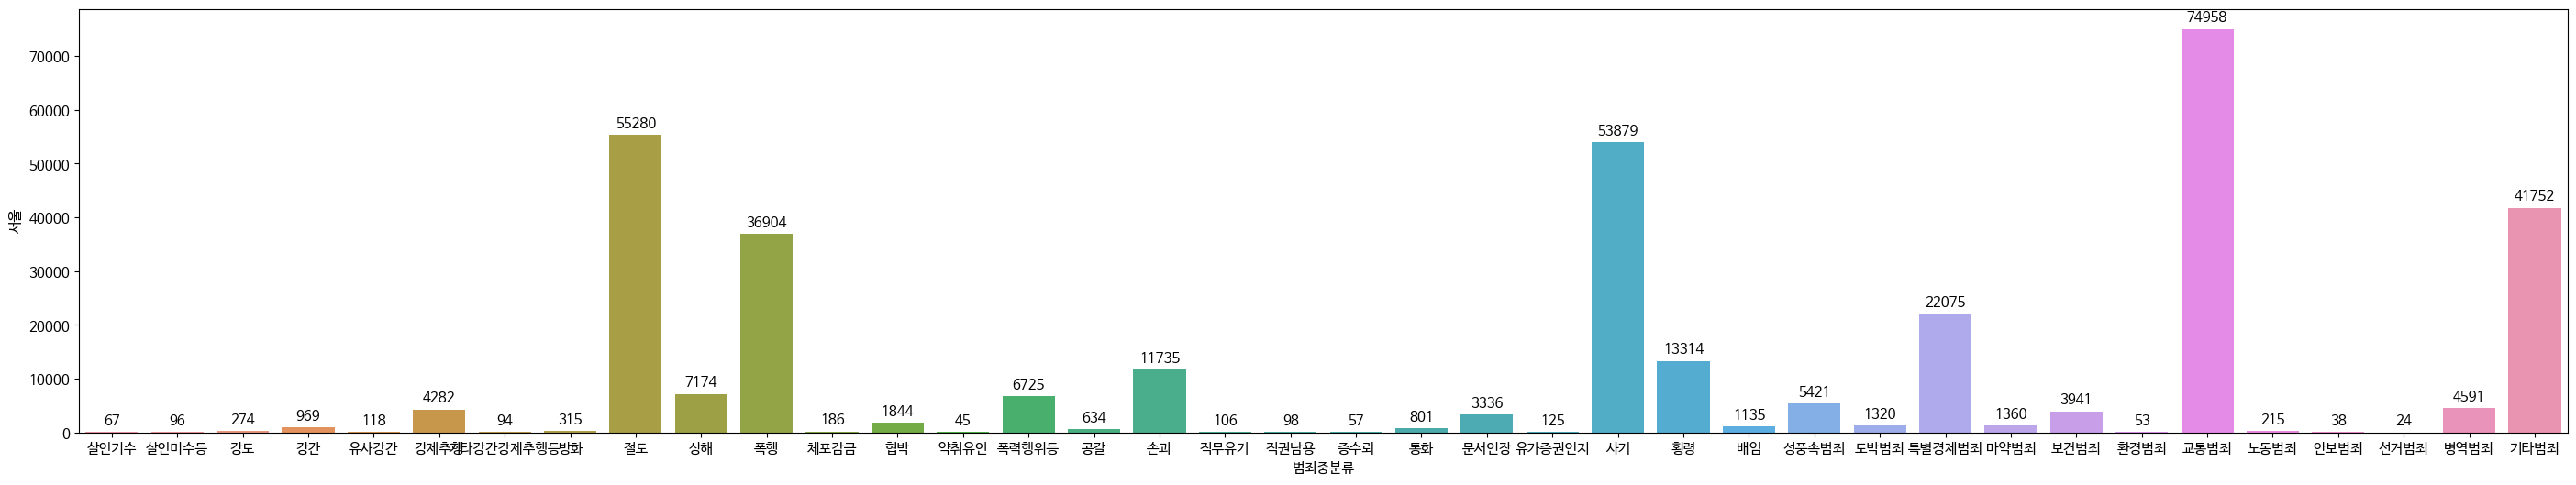

In [69]:
plt.figure(figsize=(35, 6))
ax = sns.barplot(data=df, x='범죄중분류', y="서울")

# 자세한 정보 제공을 위해 그래프 위에 해당 건수 출력
for p in ax.patches :
  ax.annotate(str(int(p.get_height())),
   (p.get_x() + p.get_width() / 2.,p.get_height()),
              ha='center', va='center', xytext=(0, 9), textcoords = 'offset points')

2, 부산

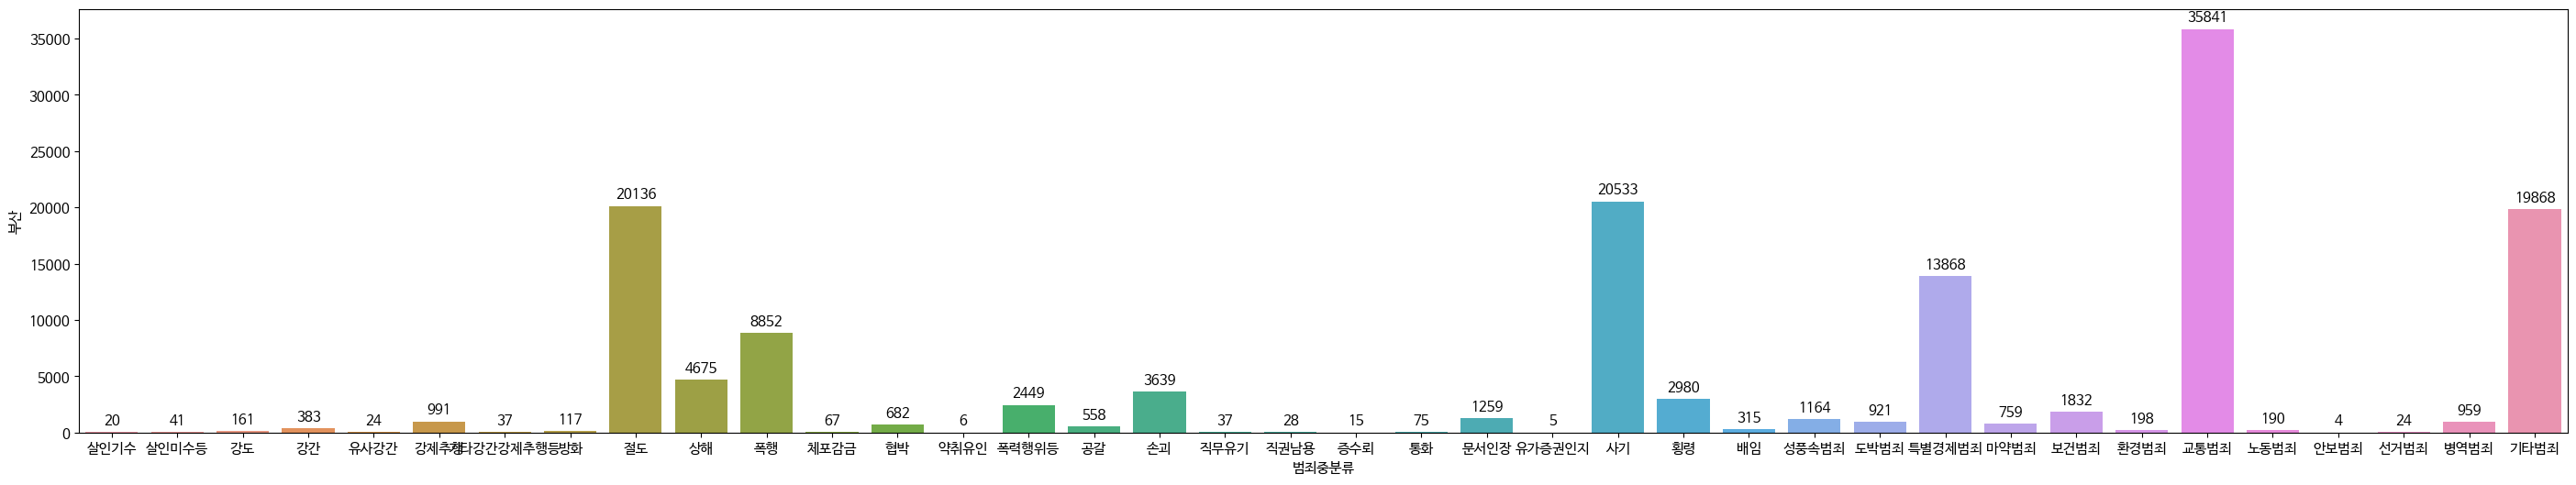

In [70]:
plt.figure(figsize=(35, 6))
ax = sns.barplot(data=df, x='범죄중분류', y="부산")

for p in ax.patches :
  ax.annotate(str(int(p.get_height())),
   (p.get_x() + p.get_width() / 2.,p.get_height()),
              ha='center', va='center', xytext=(0, 9), textcoords = 'offset points')

3, 대구

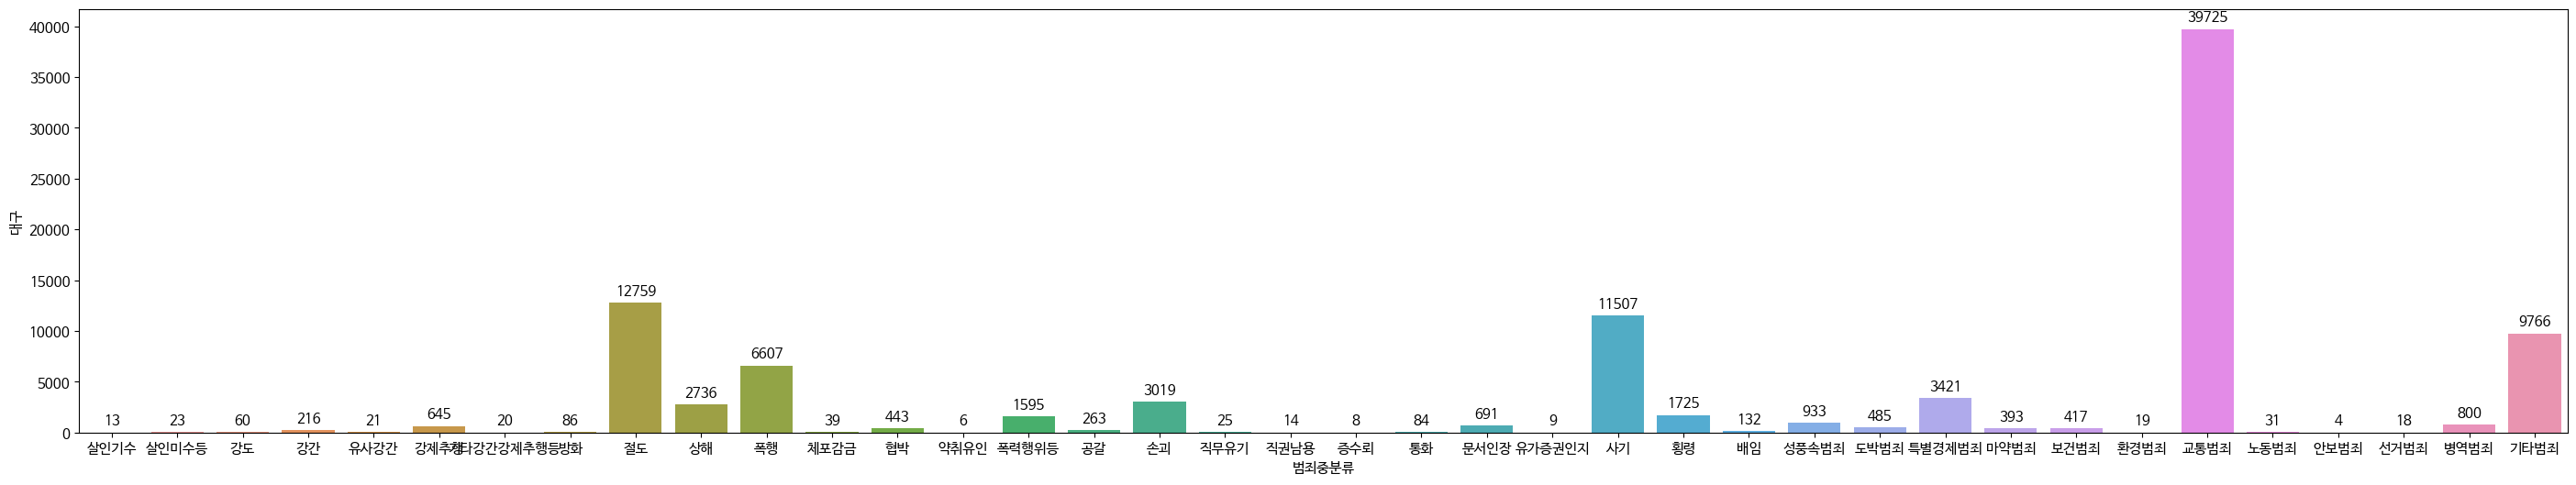

In [71]:
plt.figure(figsize=(35, 6))
ax = sns.barplot(data=df, x='범죄중분류', y="대구")

for p in ax.patches :
  ax.annotate(str(int(p.get_height())),
   (p.get_x() + p.get_width() / 2.,p.get_height()),
              ha='center', va='center', xytext=(0, 9), textcoords = 'offset points')

4, 인천

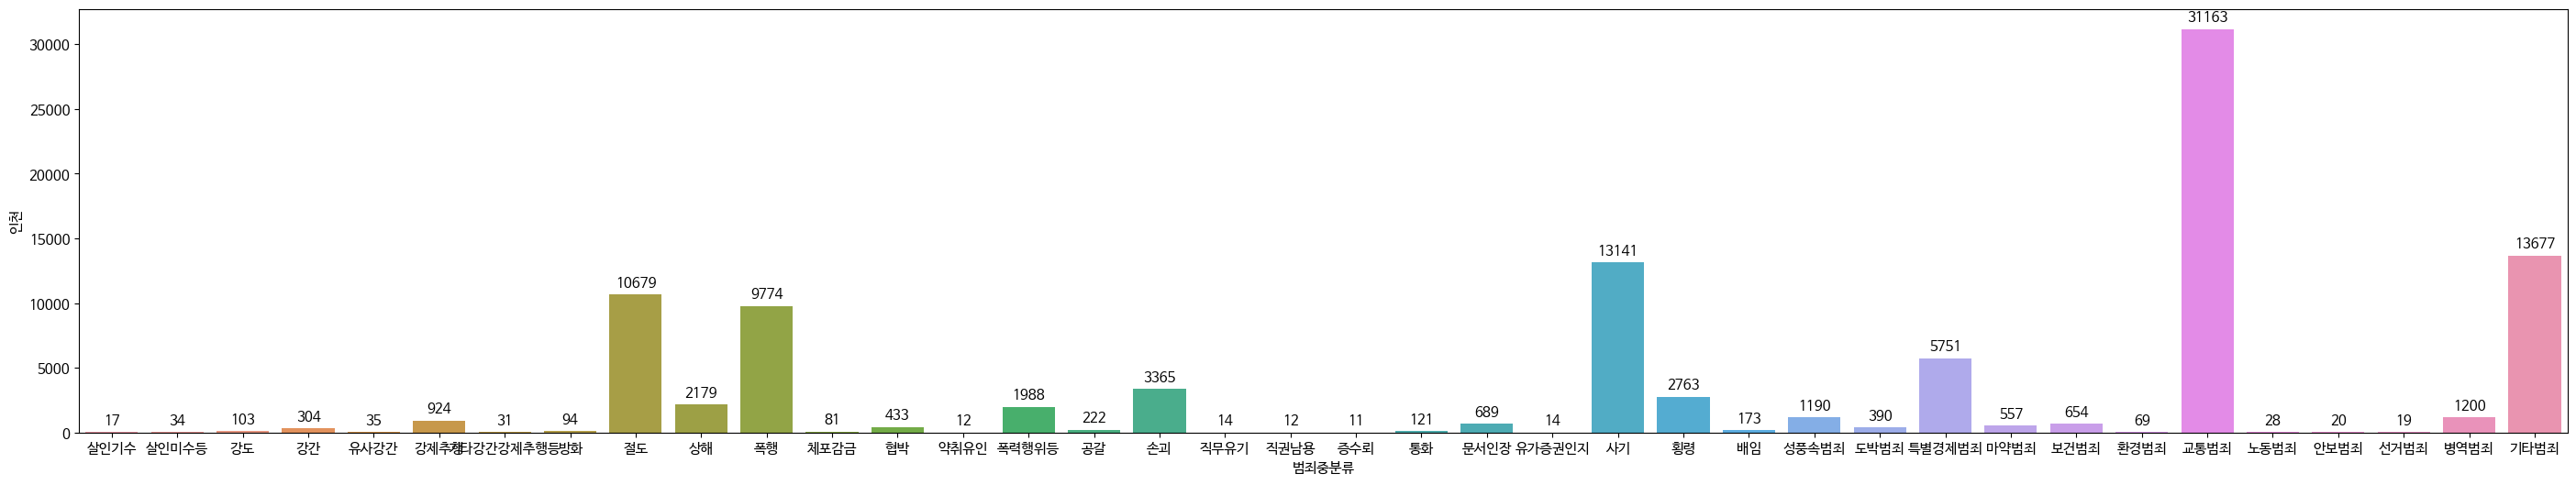

In [72]:
plt.figure(figsize=(35, 6))
ax = sns.barplot(data=df, x='범죄중분류', y="인천")

for p in ax.patches :
  ax.annotate(str(int(p.get_height())),
   (p.get_x() + p.get_width() / 2.,p.get_height()),
              ha='center', va='center', xytext=(0, 9), textcoords = 'offset points')

4, 광주

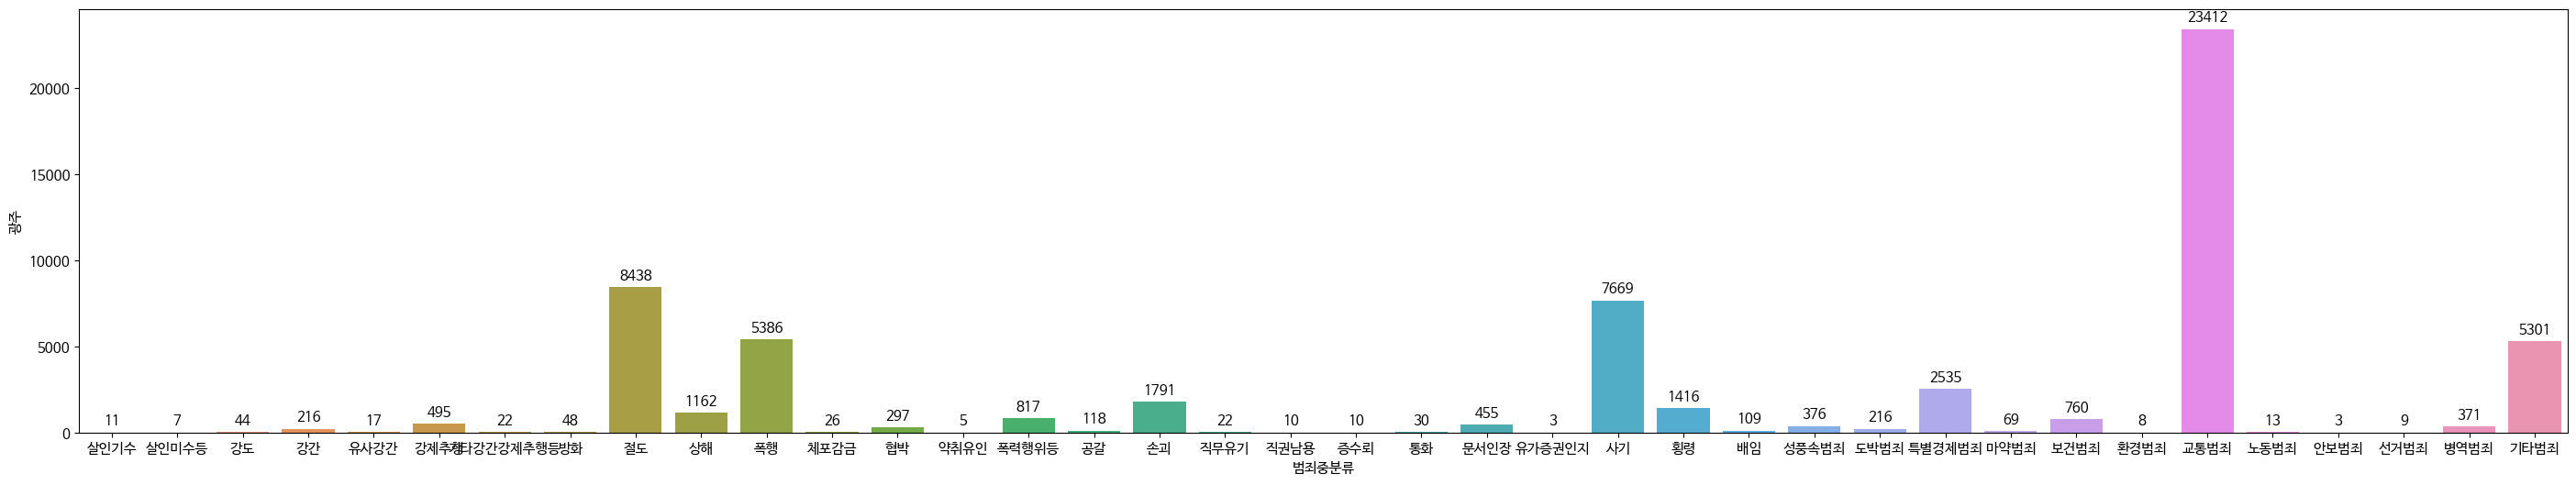

In [73]:
plt.figure(figsize=(35, 6))
ax = sns.barplot(data=df, x='범죄중분류', y="광주")

for p in ax.patches :
  ax.annotate(str(int(p.get_height())),
   (p.get_x() + p.get_width() / 2.,p.get_height()),
              ha='center', va='center', xytext=(0, 9), textcoords = 'offset points')

5, 대전

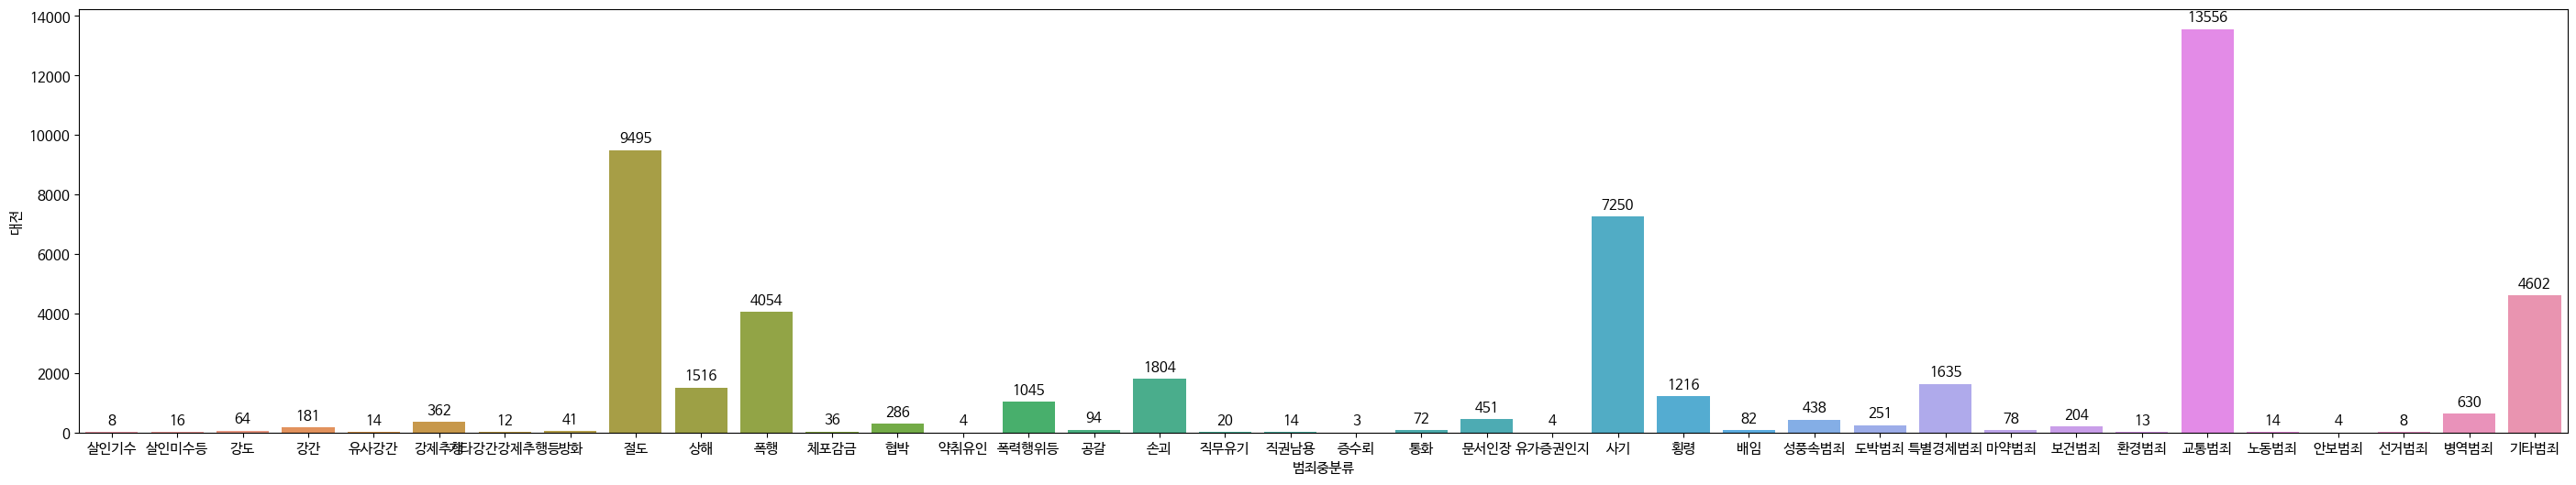

In [74]:
plt.figure(figsize=(35, 6))
ax = sns.barplot(data=df, x='범죄중분류', y="대전")

for p in ax.patches :
  ax.annotate(str(int(p.get_height())),
   (p.get_x() + p.get_width() / 2.,p.get_height()),
              ha='center', va='center', xytext=(0, 9), textcoords = 'offset points')

6, 울산

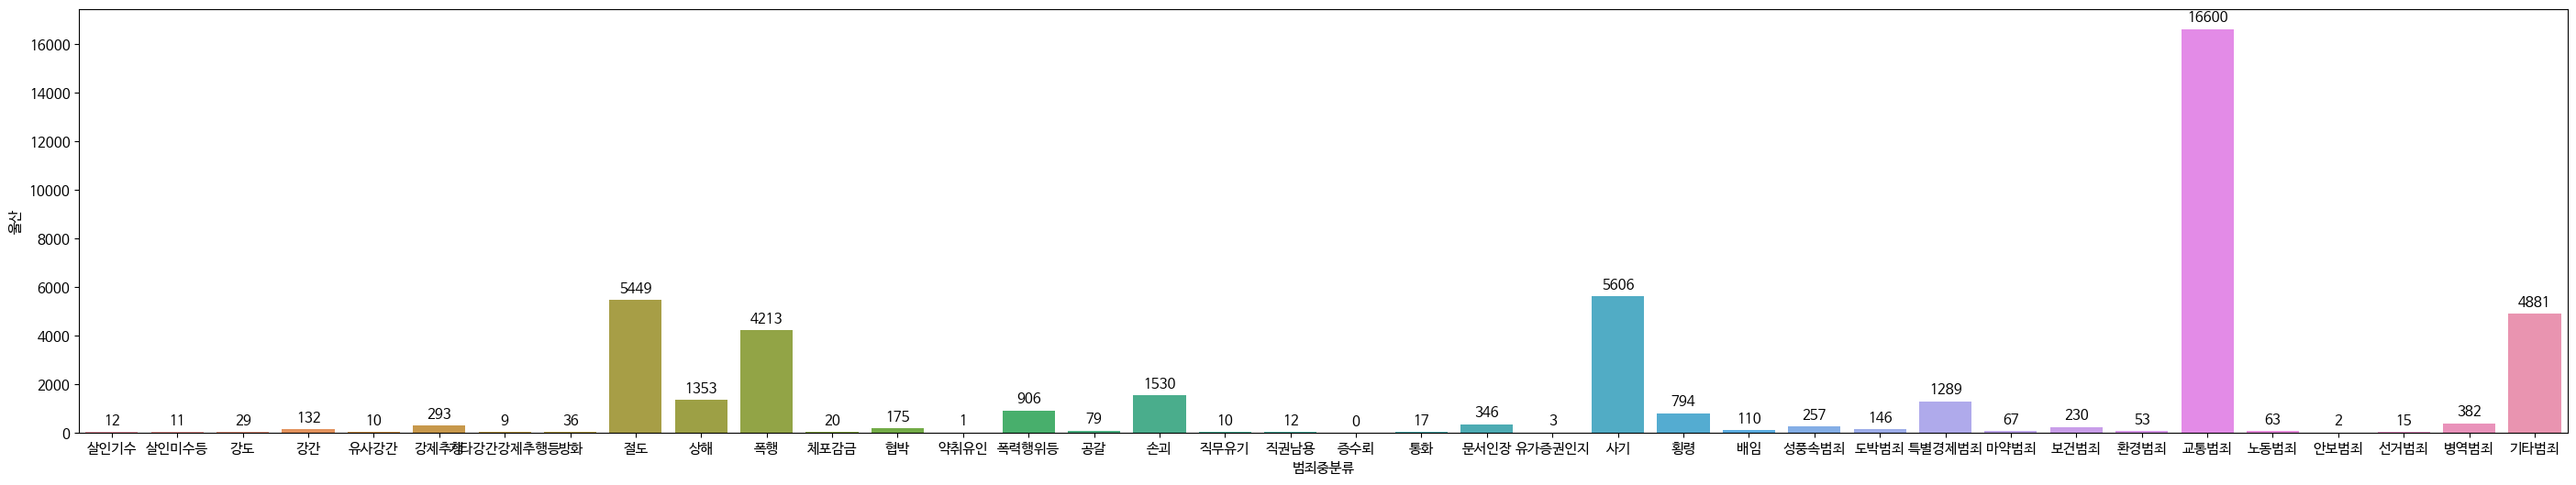

In [75]:
plt.figure(figsize=(35, 6))
ax = sns.barplot(data=df, x='범죄중분류', y="울산")

for p in ax.patches :
  ax.annotate(str(int(p.get_height())),
   (p.get_x() + p.get_width() / 2.,p.get_height()),
              ha='center', va='center', xytext=(0, 9), textcoords = 'offset points')

7, 세종

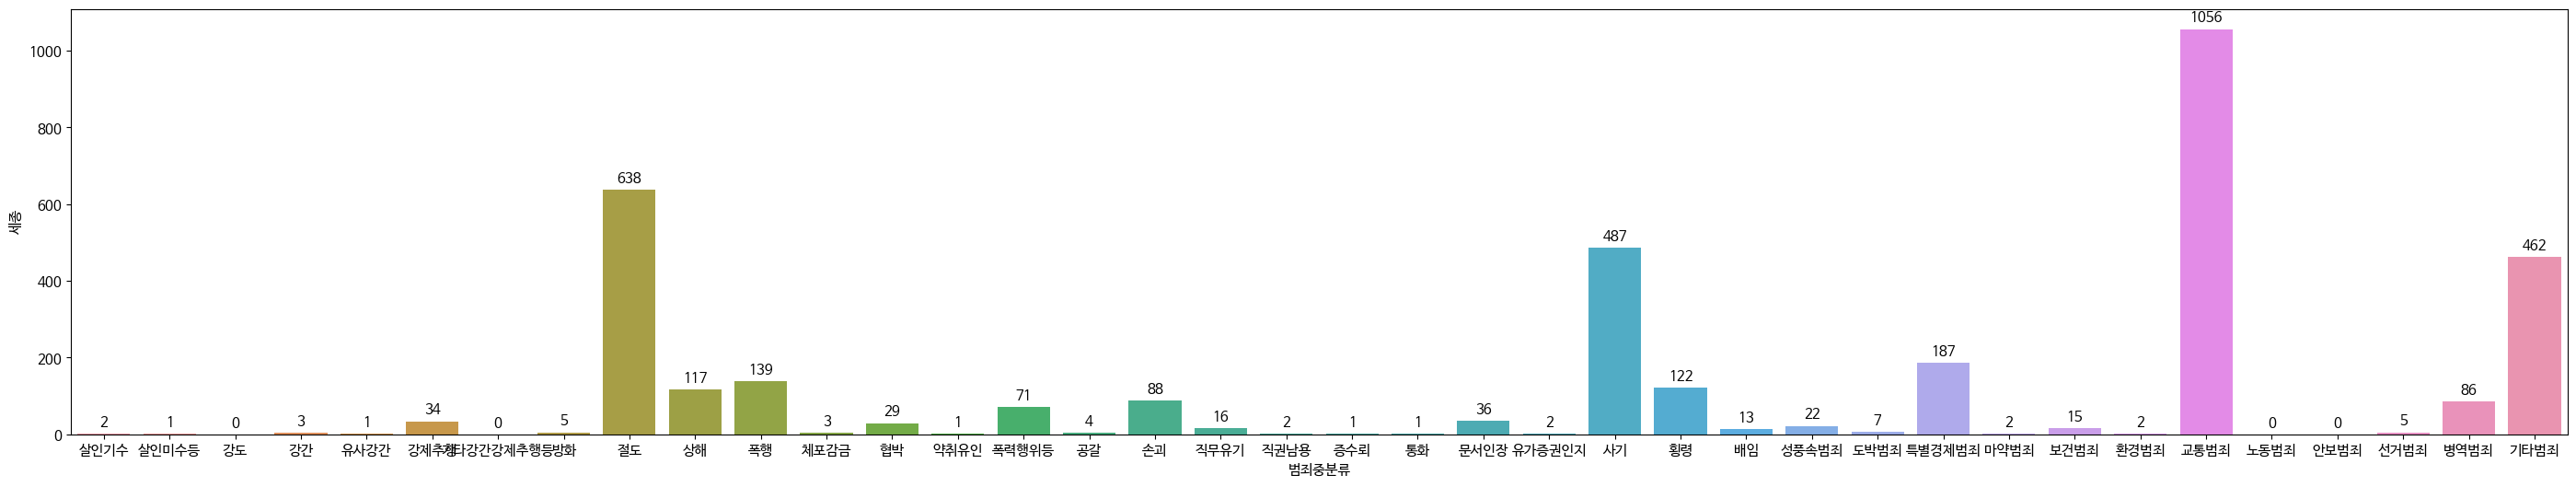

In [76]:
plt.figure(figsize=(35, 6))
ax = sns.barplot(data=df, x='범죄중분류', y="세종")

for p in ax.patches :
  ax.annotate(str(int(p.get_height())),
   (p.get_x() + p.get_width() / 2.,p.get_height()),
              ha='center', va='center', xytext=(0, 9), textcoords = 'offset points')

8, 경기도

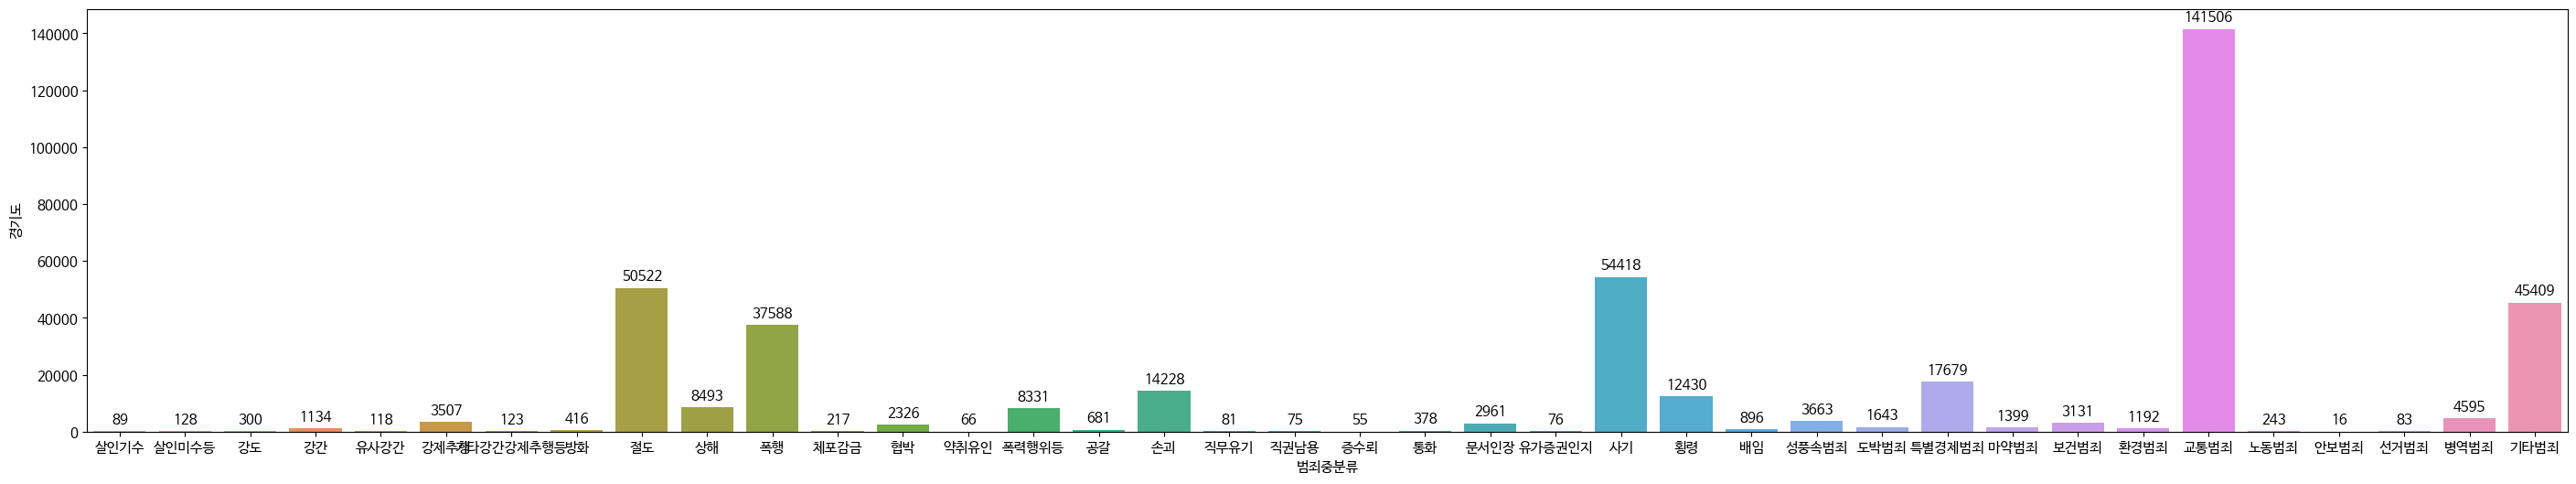

In [77]:
plt.figure(figsize=(35, 6))
ax = sns.barplot(data=df, x='범죄중분류', y="경기도")

for p in ax.patches :
  ax.annotate(str(int(p.get_height())),
   (p.get_x() + p.get_width() / 2.,p.get_height()),
              ha='center', va='center', xytext=(0, 9), textcoords = 'offset points')

9, 강원도

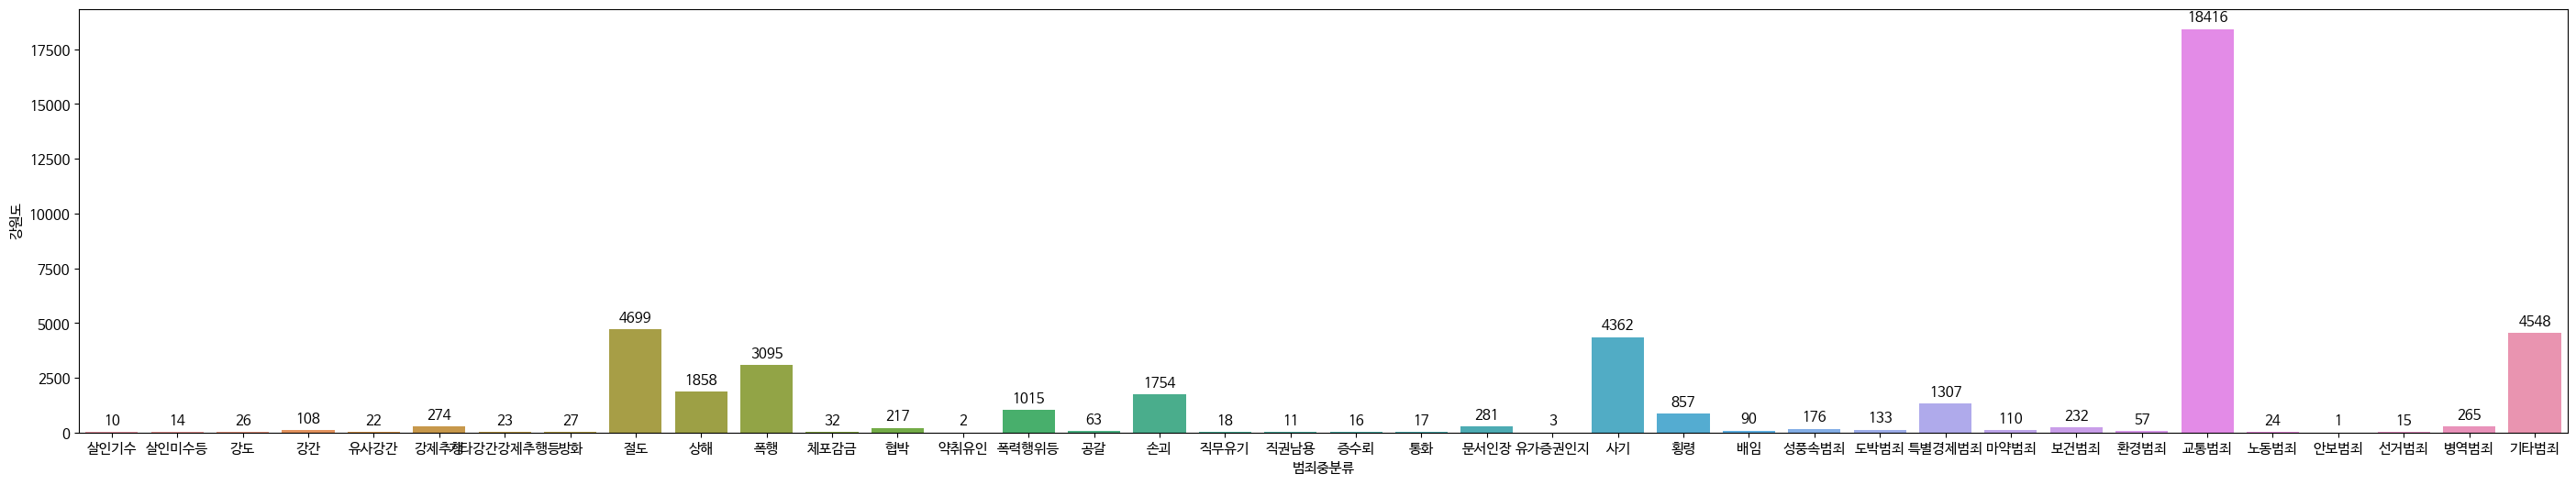

In [78]:
plt.figure(figsize=(35, 6))
ax = sns.barplot(data=df, x='범죄중분류', y="강원도")

for p in ax.patches :
  ax.annotate(str(int(p.get_height())),
   (p.get_x() + p.get_width() / 2.,p.get_height()),
              ha='center', va='center', xytext=(0, 9), textcoords = 'offset points')

10, 전라도

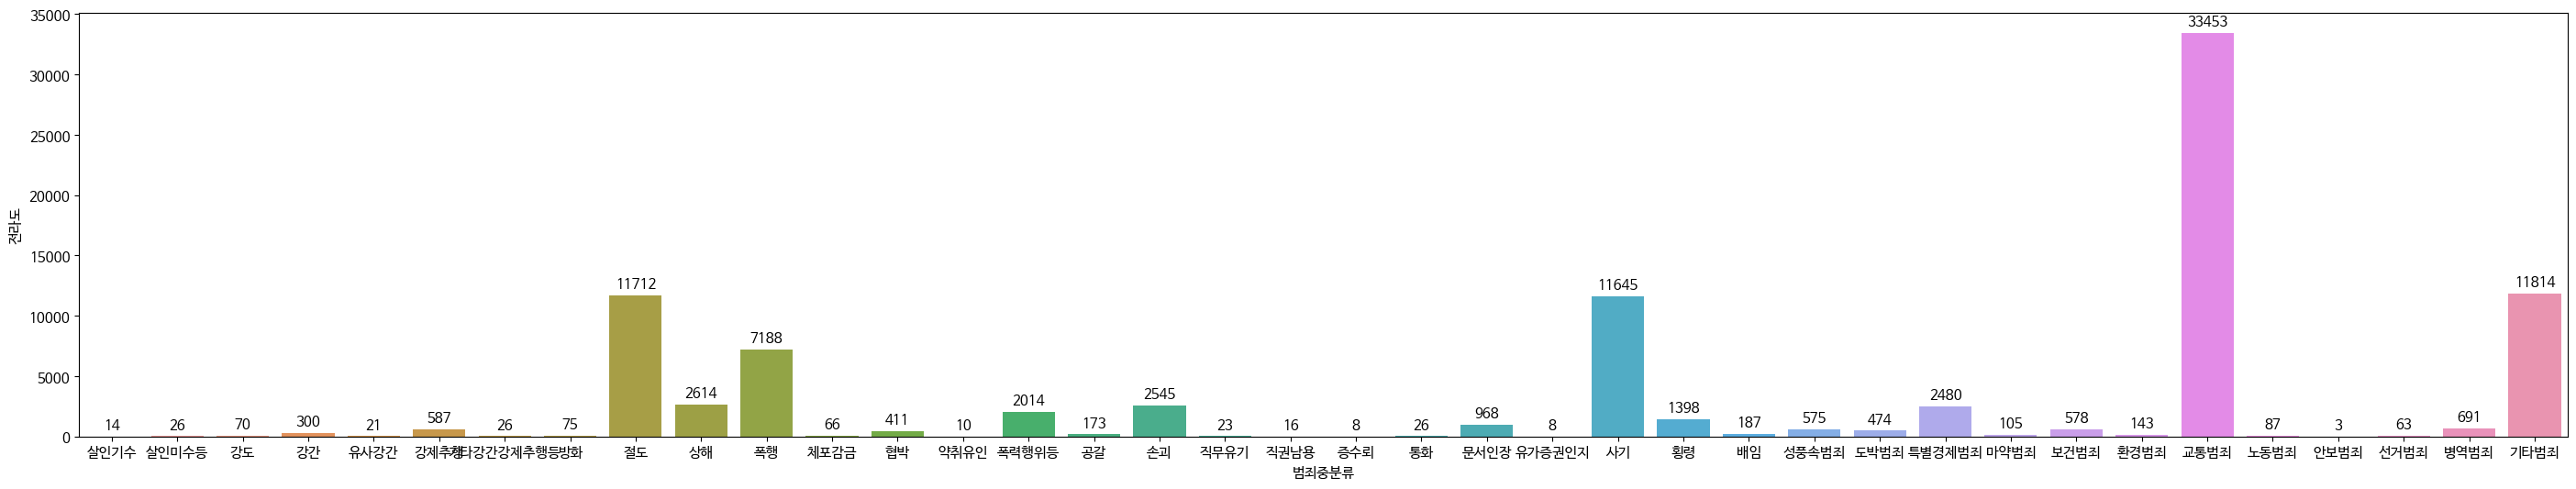

In [79]:
plt.figure(figsize=(35, 6))
ax = sns.barplot(data=df, x='범죄중분류', y="전라도")

for p in ax.patches :
  ax.annotate(str(int(p.get_height())),
   (p.get_x() + p.get_width() / 2.,p.get_height()),
              ha='center', va='center', xytext=(0, 9), textcoords = 'offset points')

11, 경상도

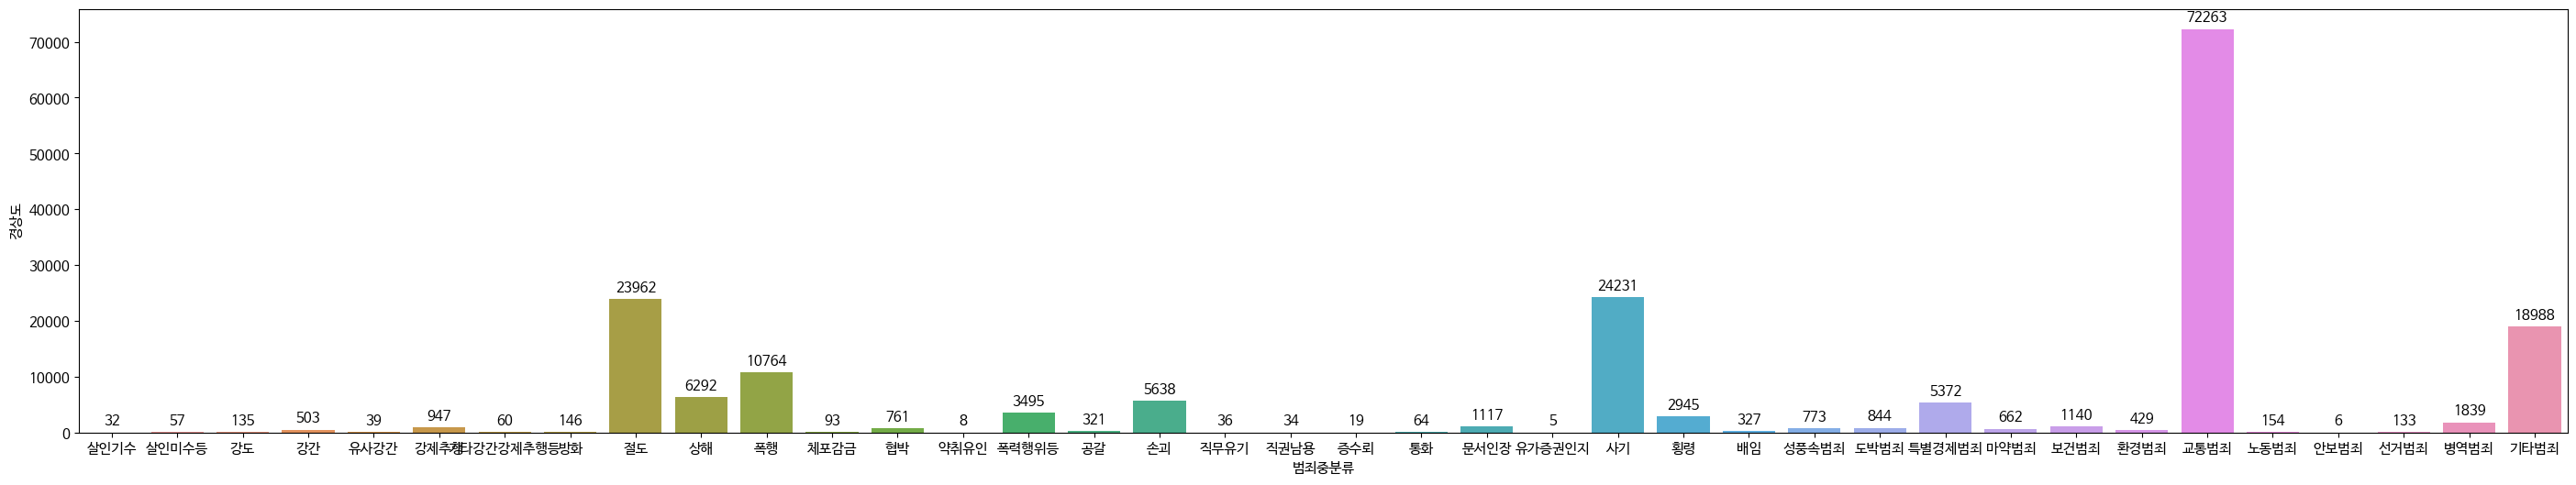

In [80]:
plt.figure(figsize=(35, 6))
ax = sns.barplot(data=df, x='범죄중분류', y="경상도")

for p in ax.patches :
  ax.annotate(str(int(p.get_height())),
   (p.get_x() + p.get_width() / 2.,p.get_height()),
              ha='center', va='center', xytext=(0, 9), textcoords = 'offset points')

12, 제주도

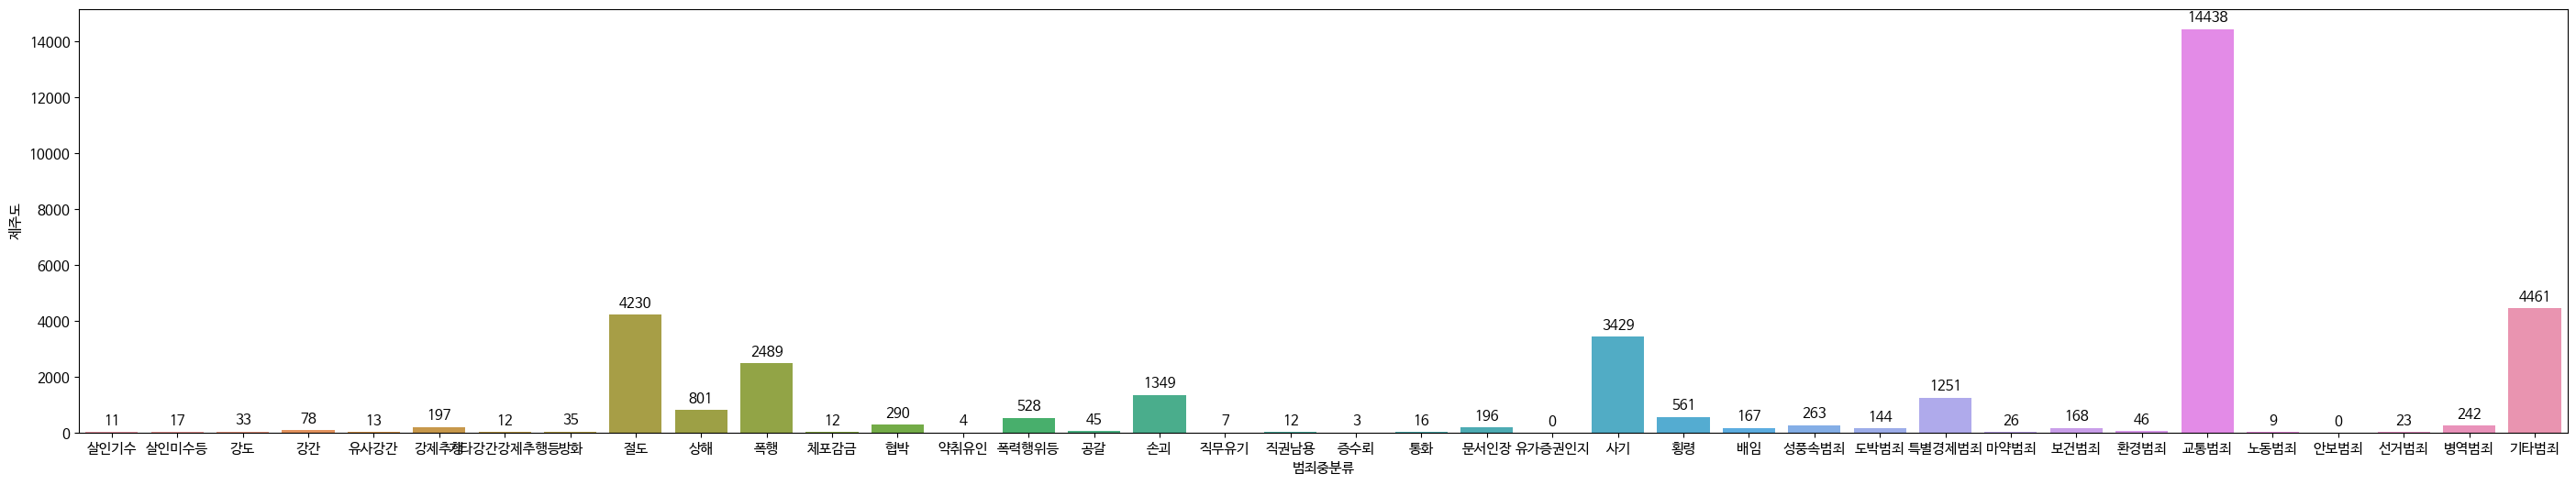

In [81]:
plt.figure(figsize=(35, 6))
ax = sns.barplot(data=df, x='범죄중분류', y="제주도")

for p in ax.patches :
  ax.annotate(str(int(p.get_height())),
   (p.get_x() + p.get_width() / 2.,p.get_height()),
              ha='center', va='center', xytext=(0, 9), textcoords = 'offset points')



---



장소 별 일어난 범죄 데이터 살펴보기




In [35]:
_df = pd.read_csv("/content/whereCrime.csv", encoding='cp949')
_df.head()

,범죄대분류,범죄중분류,아파트_연립다세대,단독주택,고속도로,노상,백화점,슈퍼마켓,편의점,대형할인매장,...,종교기관,산야,해상,부대,구금장소,공지,주차장,공중화장실,피씨방,기타
0,강력범죄,살인기수,114,60,0,28,0,0,1,0,...,1,3,3,0,0,0,5,0,0,17
1,강력범죄,살인미수등,123,85,0,105,0,1,0,1,...,1,3,0,0,0,0,5,2,1,33
2,강력범죄,강도,62,46,0,141,0,12,32,1,...,0,3,0,0,1,0,21,1,4,30
3,강력범죄,강간,1616,880,0,158,0,2,3,0,...,7,9,0,1,0,1,45,48,3,560
4,강력범죄,유사강간,240,147,2,57,1,0,0,0,...,2,5,0,0,2,0,7,12,1,111




---
데이터가 너무 많아서 36곳의 장소 중 기준에 적합한 것을 선정<br>


- 선정기준 - 2만 건이 넘어가는 데이터가 하나라도 있는 것들

In [90]:
import numpy as np
choseData = _df.loc[:, '아파트_연립다세대':'피씨방'].columns[(_df.loc[:, '아파트_연립다세대':'피씨방'].max() >= 20000)]

selected_columns = np.array(choseData)

print(selected_columns)

['아파트_연립다세대' '노상' '사무실' '해상']


1, 아파트

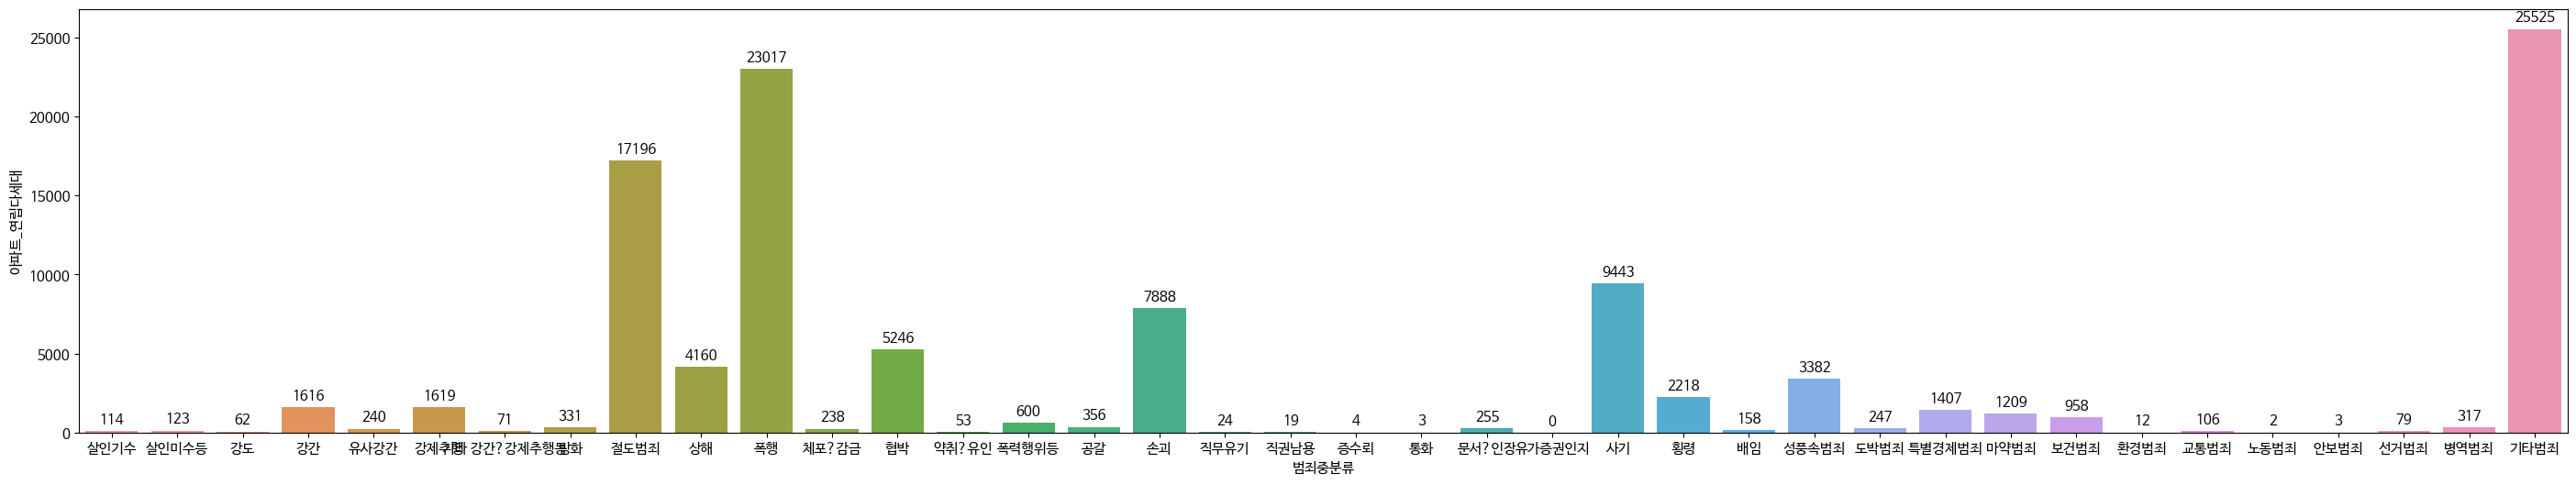

In [87]:
plt.figure(figsize=(35, 6))
ax = sns.barplot(data=_df, x='범죄중분류', y="아파트_연립다세대")

for p in ax.patches :
  ax.annotate(str(int(p.get_height())),
   (p.get_x() + p.get_width() / 2.,p.get_height()),
              ha='center', va='center', xytext=(0, 9), textcoords = 'offset points')

2, 노상

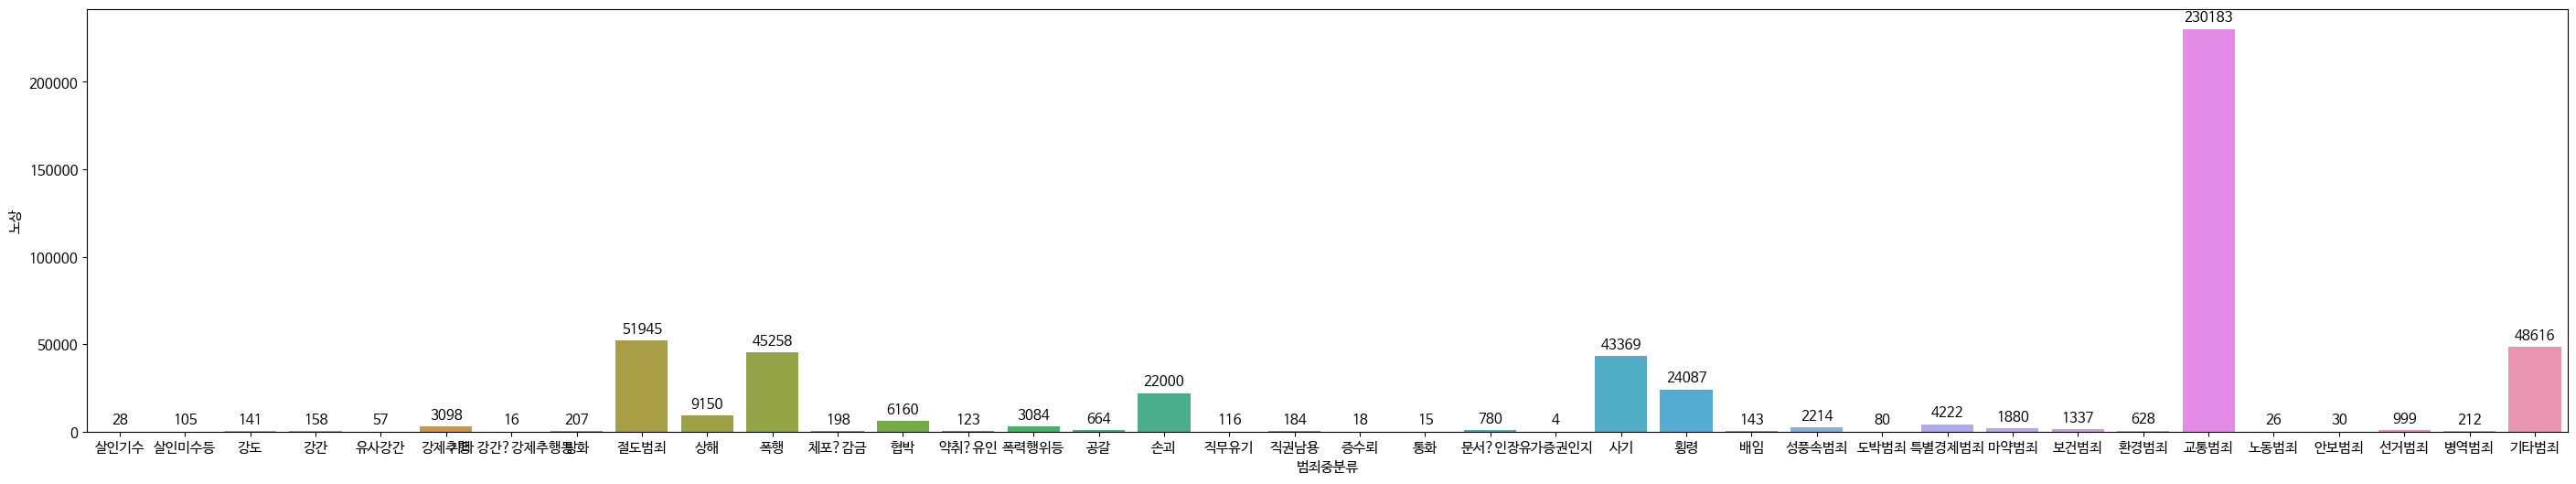

In [83]:
plt.figure(figsize=(35, 6))
ax = sns.barplot(data=_df, x='범죄중분류', y="노상")

for p in ax.patches :
  ax.annotate(str(int(p.get_height())),
   (p.get_x() + p.get_width() / 2.,p.get_height()),
              ha='center', va='center', xytext=(0, 9), textcoords = 'offset points')

3, 사무실

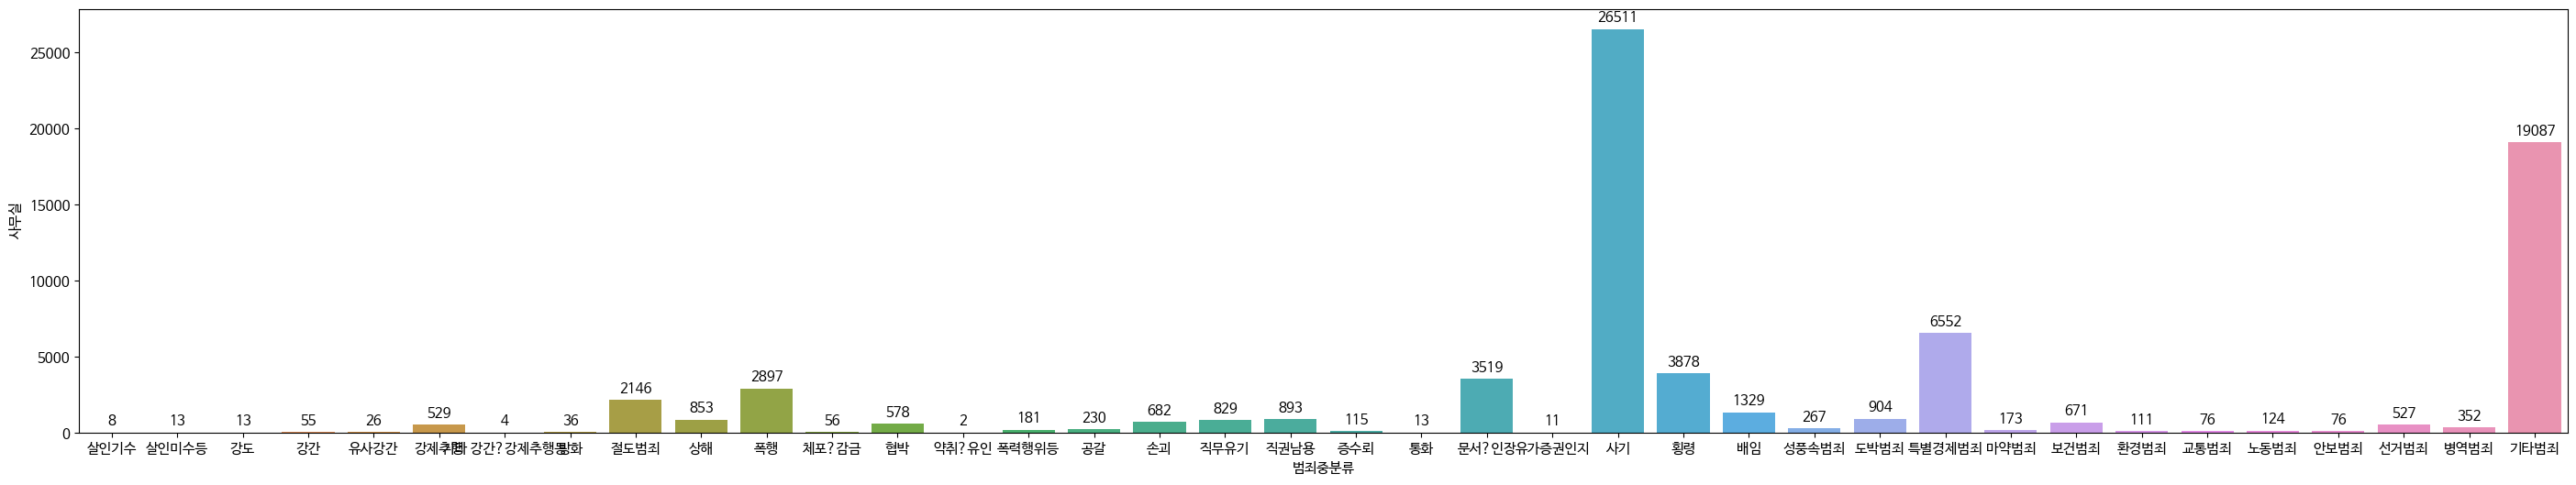

In [84]:
plt.figure(figsize=(35, 6))
ax = sns.barplot(data=_df, x='범죄중분류', y="사무실")

for p in ax.patches :
  ax.annotate(str(int(p.get_height())),
   (p.get_x() + p.get_width() / 2.,p.get_height()),
              ha='center', va='center', xytext=(0, 9), textcoords = 'offset points')

4, 해상

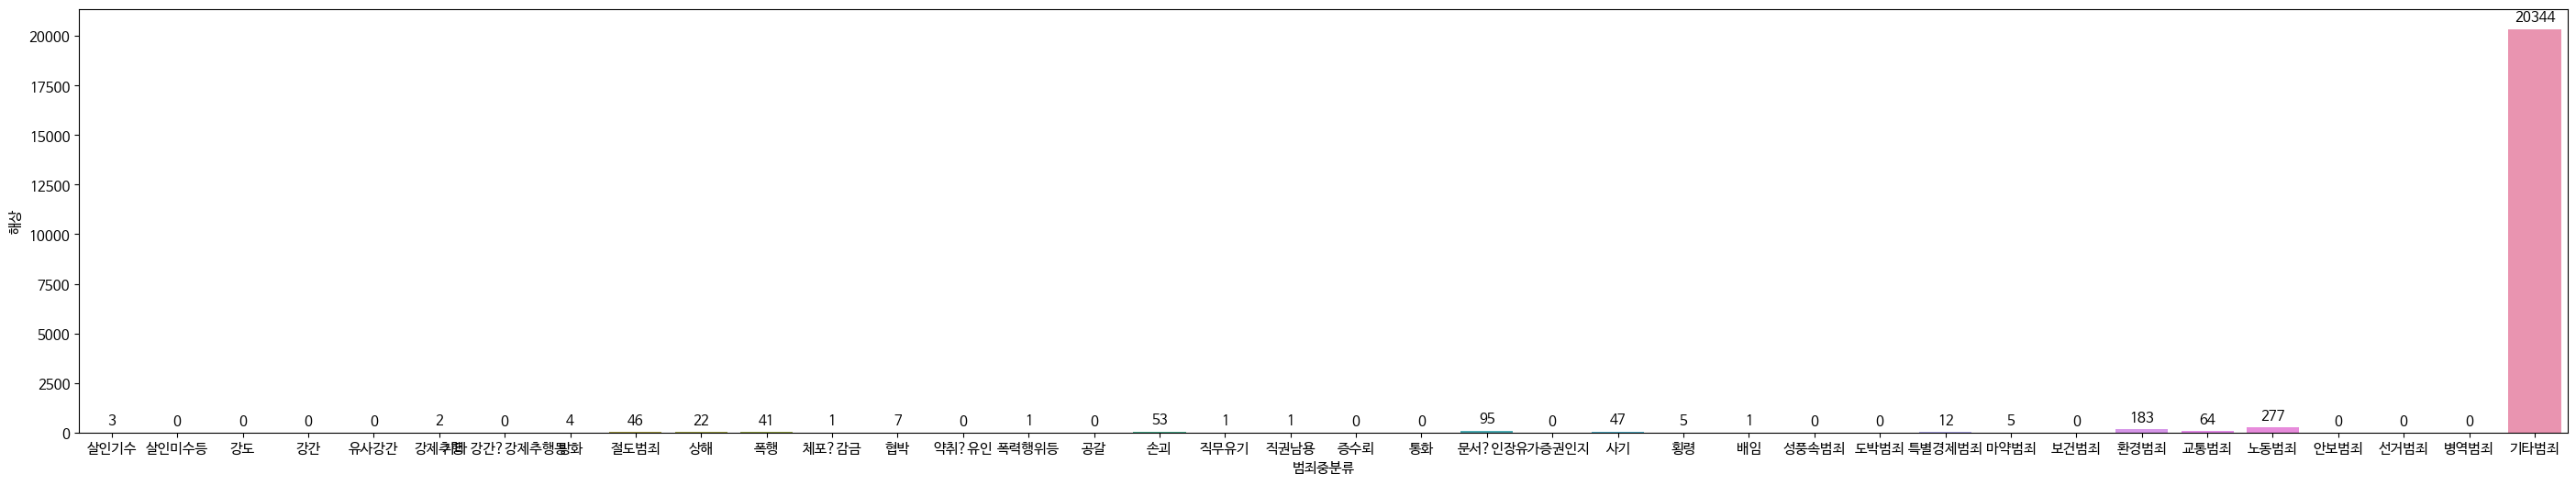

In [85]:
plt.figure(figsize=(35, 6))
ax = sns.barplot(data=_df, x='범죄중분류', y="해상")

for p in ax.patches :
  ax.annotate(str(int(p.get_height())),
   (p.get_x() + p.get_width() / 2.,p.get_height()),
              ha='center', va='center', xytext=(0, 9), textcoords = 'offset points')
